# Installing and importing essential packages

In [ ]:
# Don't run this cell if you have already installed
# the packages in requirements.txt
!pip install openpyxl
!pip install missingno
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install plotly
!pip install sns

In [149]:
# Lets import the packages 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import seaborn as sns

# Setting the filepath and reading from file
Let's use OS module for sorting the filenames so that 
the program works on any machine 

In [2]:
# Getting the current working directory
base_path = os.getcwd()
# Joining our filename with the the current working directory
file_path = os.path.join(base_path, 'app_data.xlsx')

# Setting the name of dataset as the name of file (which means Appendicitis Data)
app_data = pd.read_excel(file_path)

In [3]:
# Let's have a look at the dataset
app_data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.680000,16.900000,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.100000,31.900000,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.140000,23.300000,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.370000,20.600000,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.080000,16.900000,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,25.250476,female,166.5,70.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,17.092402,20.429418,female,158.0,51.0,6.0,secondary surgical,complicated,appendicitis,appendicitis,...,Douglas,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
779,14.992471,19.909972,female,152.0,46.0,4.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig
780,7.195072,14.295549,male,129.3,23.9,5.0,primary surgical,uncomplicated,appendicitis,appendicitis,...,NaN,no,NaN,yes,NaN,no,NaN,NaN,NaN,NaN


# First analysis of the data
Let's see some basic statistics of the dataset

In [4]:
app_data.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


In [5]:
# Let's check how many null values are in there in the dataset

# The following command lists the column names in descending order 
# of the data values(i.e. not null values) present in each column
app_data.notnull().sum().sort_values(ascending=False)

Age                                 781
Management                          781
Severity                            781
Sex                                 780
Diagnosis_Presumptive               780
Diagnosis                           780
Weight                              779
US_Performed                        778
Length_of_Stay                      778
Appendix_on_US                      777
WBC_Count                           776
Body_Temperature                    775
Lower_Right_Abd_Pain                774
Nausea                              774
Migratory_Pain                      773
Peritonitis                         773
Loss_of_Appetite                    772
CRP                                 771
Contralateral_Rebound_Tenderness    767
Coughing_Pain                       766
Stool                               765
Hemoglobin                          764
Thrombocyte_Count                   764
RBC_Count                           764
US_Number                           760


## Filtering data
We notice some columns that are sparsely populated.
They might play a crucial role in the decision process (medically speaking).
The [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8426774/#:~:text=In%20a%20literature%2C%20when%20more,provides%20insignificant%20benefit%20(10).) states that more than 10% missing data skews the result

Hence, we will discard any column which has not null values less than 700, which is ~90% of 780 

In [155]:
# Finding the count of null values in the dataset,
# sorting them in descending order and storing the result 
# in a temporary variable
temp = app_data.notnull().sum().sort_values(ascending=False)

# Selecting the column names which have >700 not null values
# (we use lambda function here)
temp = temp.loc[lambda s: s > 700]

# Let's see how many columns we selected
print("Number of columns selected : ",len(temp))

# Also, let's print out which columns we have selected
print("\nColumns selected and population of data in them:")
print(temp)

Number of columns selected :  34

Columns selected and population of data in them:
Age                                 781
Management                          781
Severity                            781
Sex                                 780
Diagnosis_Presumptive               780
Diagnosis                           780
Weight                              779
US_Performed                        778
Length_of_Stay                      778
Appendix_on_US                      777
WBC_Count                           776
Body_Temperature                    775
Lower_Right_Abd_Pain                774
Nausea                              774
Migratory_Pain                      773
Peritonitis                         773
Loss_of_Appetite                    772
CRP                                 771
Contralateral_Rebound_Tenderness    767
Coughing_Pain                       766
Stool                               765
Hemoglobin                          764
Thrombocyte_Count                   7

In [156]:
# Now slicing the app_data variable and select the columns that are in temp variable  
# We used temp variable since we only needed it to find out which 
# columns to select. After this operation we don't need temp variable

# We will call this dataframe app_data_filtered, because we will compare it with the 
# app_data later
app_data_filtered = app_data[list(temp.index)]

# temp.index returns an index object, which is converted to a list using 
# the list() method

# Let's see the resulting dataframe
app_data_filtered

,Age,Management,Severity,Sex,Diagnosis_Presumptive,Diagnosis,Weight,US_Performed,Length_of_Stay,Appendix_on_US,...,US_Number,RDW,Height,BMI,Dysuria,Psoas_Sign,Neutrophilia,Alvarado_Score,Paedriatic_Appendicitis_Score,Free_Fluids
0,12.680000,conservative,uncomplicated,female,appendicitis,appendicitis,37.0,yes,3.0,yes,...,882.0,12.2,148.0,16.900000,no,yes,no,4.0,3.0,no
1,14.100000,conservative,uncomplicated,male,appendicitis,no appendicitis,69.5,yes,2.0,no,...,883.0,12.7,147.0,31.900000,yes,yes,no,5.0,4.0,no
2,14.140000,conservative,uncomplicated,female,appendicitis,no appendicitis,62.0,yes,4.0,no,...,884.0,12.2,163.0,23.300000,no,yes,no,5.0,3.0,no
3,16.370000,conservative,uncomplicated,female,appendicitis,no appendicitis,56.0,yes,3.0,no,...,886.0,13.2,165.0,20.600000,yes,yes,no,7.0,6.0,no
4,11.080000,conservative,uncomplicated,female,appendicitis,appendicitis,45.0,yes,3.0,yes,...,887.0,13.6,163.0,16.900000,no,yes,no,5.0,6.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.413415,primary surgical,uncomplicated,female,appendicitis,appendicitis,70.0,yes,4.0,yes,...,126.0,13.4,166.5,25.250476,no,yes,yes,8.0,7.0,no
778,17.092402,secondary surgical,complicated,female,appendicitis,appendicitis,51.0,yes,6.0,no,...,NaN,12.8,158.0,20.429418,no,no,yes,5.0,3.0,no
779,14.992471,primary surgical,uncomplicated,female,appendicitis,appendicitis,46.0,yes,4.0,no,...,127.0,12.8,152.0,19.909972,yes,no,no,5.0,3.0,yes
780,7.195072,primary surgical,uncomplicated,male,appendicitis,appendicitis,23.9,yes,5.0,yes,...,128.0,12.7,129.3,14.295549,no,no,yes,9.0,8.0,yes


This gives us the columns in which we will impute the values (as needed) to make the dataset complete

# Data Imputation

We could drop the rows with null values by using .dropna() method, but we are choosing to impute missing values instead. We will use KNN Imputer for numerical values and Simple Imputer for categorical values.


Firstly, let's see how our dataset looks in terms of missing values when compared with initial dataset.

## Visualising missing values

We will use a python package called missingno to plot a matrix of missing value which will help us visualise how our dataset has improved.

<Axes: >

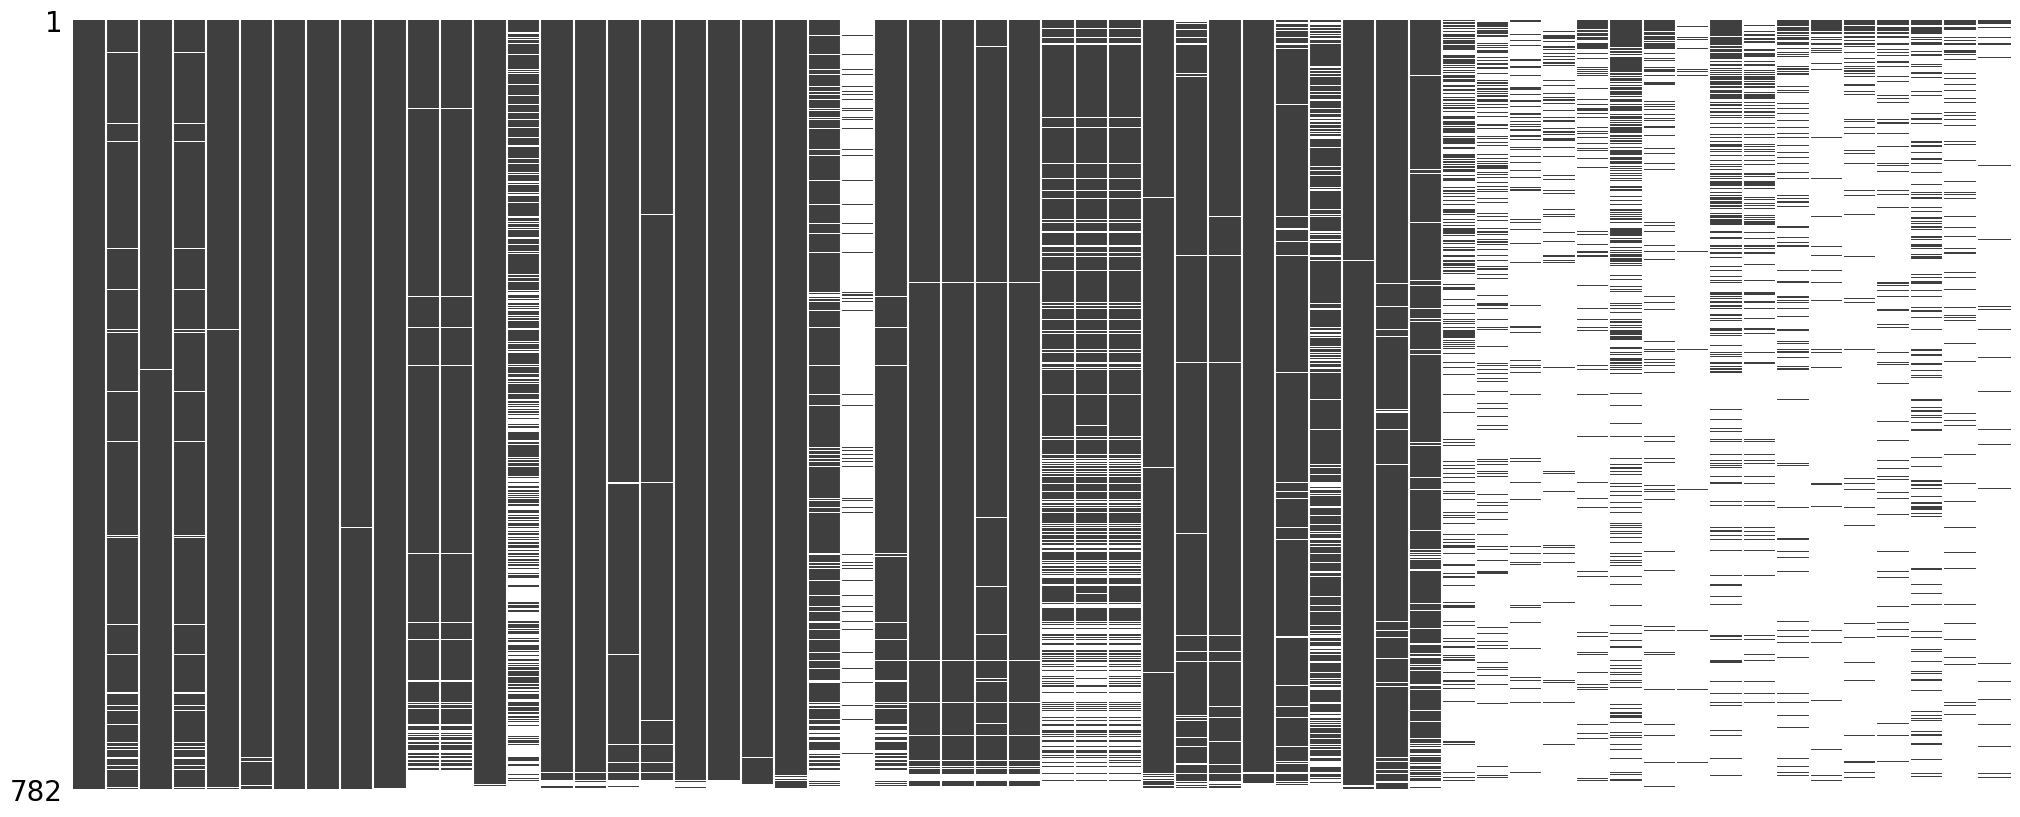

In [157]:
# Let's see how the initial dataset (i.e. app_data dataframe) looked

# sort='descending' parameter tries to sort the rows in decreasing order of missing values in them
sorted_data = msno.nullity_sort(app_data, sort='descending')
# Plotting the matrix of missing values
msno.matrix(sorted_data, sparkline=False)

<Axes: >

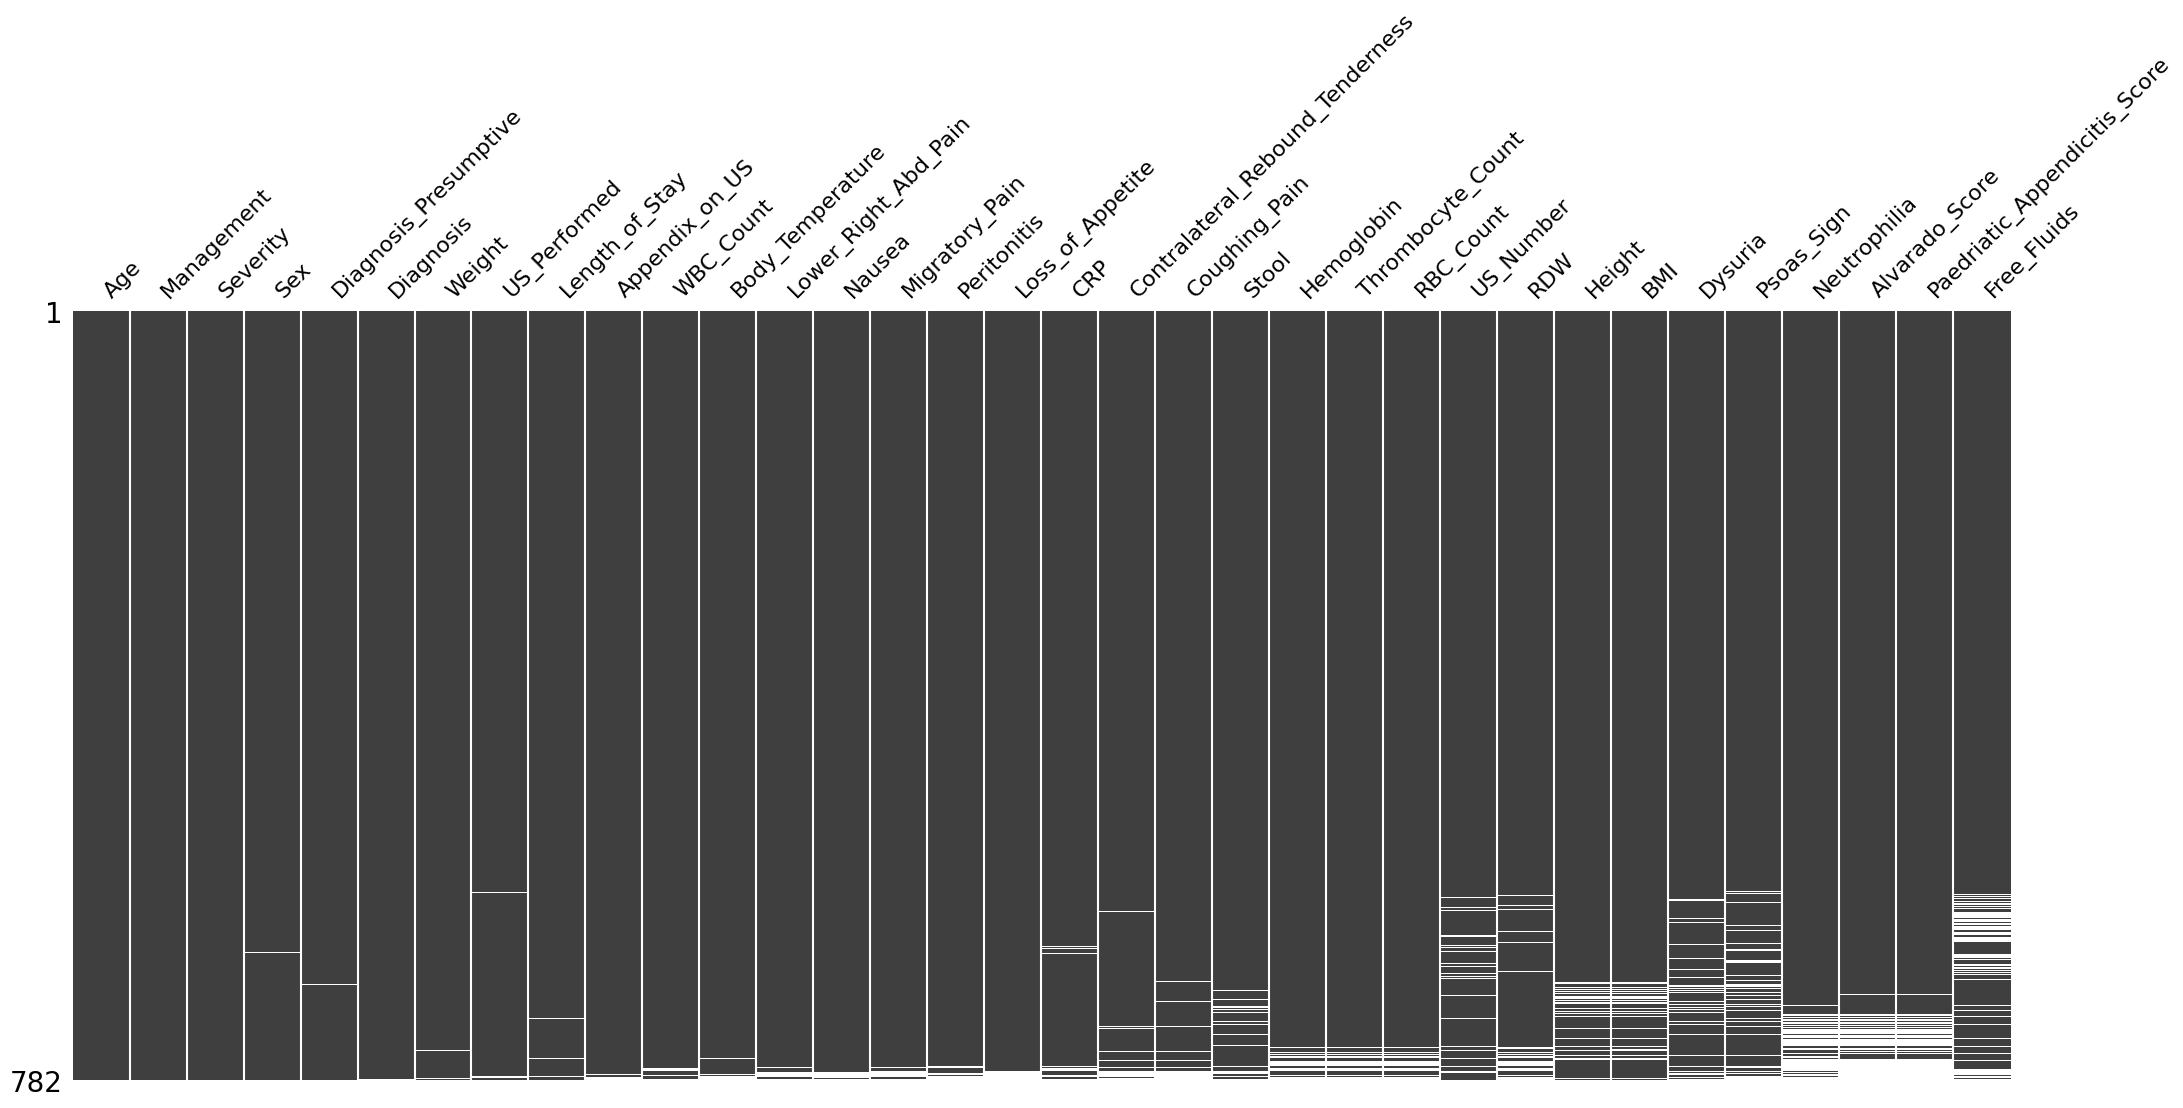

In [9]:
# Now let's see how the dataset looks after filtering (i.e. app_data_filtered dataframe)

# Sorting the dataset w.r.t. null values
sorted_data = msno.nullity_sort(app_data_filtered, sort='descending')
# Plotting the matrix of missing values
msno.matrix(sorted_data, sparkline=False)

## Numerical Imputation

For imputing numerical values, we will use the KNN Imputer from Scikit-Learn, which fills missing values using the mean of k-nearest neighbours found in the dataset.

In [10]:
# First, let's see how many missing values we have 
print(app_data_filtered.isnull().sum())

print('Total missing values : ', app_data_filtered.isnull().sum().sum())

Age                                  1
Management                           1
Severity                             1
Sex                                  2
Diagnosis_Presumptive                2
Diagnosis                            2
Weight                               3
US_Performed                         4
Length_of_Stay                       4
Appendix_on_US                       5
WBC_Count                            6
Body_Temperature                     7
Lower_Right_Abd_Pain                 8
Nausea                               8
Migratory_Pain                       9
Peritonitis                          9
Loss_of_Appetite                    10
CRP                                 11
Contralateral_Rebound_Tenderness    15
Coughing_Pain                       16
Stool                               17
Hemoglobin                          18
Thrombocyte_Count                   18
RBC_Count                           18
US_Number                           22
RDW                      

In [11]:
# Since KNN Imputer doesn't work with strings, we impute the values 
# using only the columns that have float values.

# We use temp_df variable to store only the columns with float values in app_data_filtered dataframe
temp_df = app_data_filtered.loc[:, app_data_filtered.dtypes == 'float64'].copy()

# Since KNN Imputer works with distances, scaling becomes an important part of the process
# Defining the scaler
scaler = MinMaxScaler()
# Scaling the values
temp_df = pd.DataFrame(scaler.fit_transform(temp_df), columns = temp_df.columns)

# Now we will define the KNN Imputer, use fit_transform and save the new (imputed) data
# to a variable

# Defining the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
# Using fit_transform and saving the resulting dataframe into temp_df
temp_df = pd.DataFrame(knn_imputer.fit_transform(temp_df), columns=temp_df.columns)

# Scaling the values back to their original scale
temp_df = pd.DataFrame(scaler.inverse_transform(temp_df), columns = temp_df.columns)

In [12]:
# Now let's merge these values with our original dataframe 
app_data_filtered.loc[:, temp_df.columns] = temp_df

# Let's have a look at the missing value statistics again 
print(app_data_filtered.isnull().sum())

print('Total missing values : ', app_data_filtered.isnull().sum().sum())

Age                                  0
Management                           1
Severity                             1
Sex                                  2
Diagnosis_Presumptive                2
Diagnosis                            2
Weight                               0
US_Performed                         4
Length_of_Stay                       0
Appendix_on_US                       5
WBC_Count                            0
Body_Temperature                     0
Lower_Right_Abd_Pain                 8
Nausea                               8
Migratory_Pain                       9
Peritonitis                          9
Loss_of_Appetite                    10
CRP                                  0
Contralateral_Rebound_Tenderness    15
Coughing_Pain                       16
Stool                               17
Hemoglobin                           0
Thrombocyte_Count                    0
RBC_Count                            0
US_Number                            0
RDW                      

## Categorical Imputation

We will use SimpleImputor from sklearn.impute to impute missing categorical values in the dataset.

In [13]:
# Initialising the SimpleImputer
simple_imputer = SimpleImputer(strategy='most_frequent')
# Fitting the imputer through data
simple_imputer.fit(app_data_filtered)
# Imputing into missing values
app_data_filtered = pd.DataFrame(simple_imputer.transform(app_data_filtered),
                                 columns=app_data_filtered.columns)

In [14]:
# Checking total missing values again
print('Total missing values : ', app_data_filtered.isnull().sum().sum())

Total missing values :  0


Also, Diagnosis_Presumptive has values other than 'appendicitis' and 'no appendicitis', whereas Diagnosis only has these two values.
We will change any value which is not 'appendicitis' or 'no appendicitis' to 'no appendicitis' so that it's easier to evaluate the data

In [15]:
app_data_filtered.loc[app_data_filtered["Diagnosis_Presumptive"] != ("appendicitis" or "no appendicitis"), "Diagnosis_Presumptive"] = 'no appendicitis'

# Data Analysis
Now that our data is ready, let's do some analysis !

In [16]:
# First of all, let's separate the dataset into input and target variables
# Diagnosis is the target variable y
y = app_data_filtered.iloc[:,5]

# Every other column except Diagnosis_presumptive is input variable
# We will separate Diagnosis_presumptive column after splitting
col_to_select = list(range(0,5)) + list(range(6,app_data_filtered.shape[1]))
x = app_data_filtered.iloc[:,col_to_select]

## Splitting the data
Let's split the data into training and testing sets

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=1
)

In [18]:
# Converting the datatypes of columns to their original types
for column in x_train.columns:
    x_train[column] = x_train[column].astype(type(x_train[column].iloc[0]))
for column in x_test.columns:
    x_test[column] = x_test[column].astype(type(x_test[column].iloc[0]))

## Further cleaning the data
Upon further inspection, we observe that the following columns must be removed because they have no effect on the target variable :
1. Diagnosis_Presumptive - because this is the presumptive diagnosis and hence doesn't play any role in the prediction of the target variable. (It's a prediction made by doctors, and we will compare it with our model later.)
2. US_Number - this is just a serial number assigned to keep track of patients' ultrasounds.

The reason we did not do it before splitting, is because we needed to split Diagnosis_Presumptive column with the rest of dataframe. This will help us compare our predictions with the doctors' predictions to get an idea of how well our model is performing.
We don't need the US_Number column howsoever.

In [19]:
# Let's remove these two columns from x_train and x_test
# We will store the values of Diagnosis_Presumptive in x_test in a variable 
# called doctors_prediction to use later to compare our predictions with

# Cleaning x_train
x_train.drop('Diagnosis_Presumptive', axis=1, inplace=True)
x_train.drop('US_Number', axis=1, inplace=True)

# Creating doctors_prediction variable and deleting it from x_test 
doctors_prediction = x_test.pop("Diagnosis_Presumptive")
x_test.drop('US_Number', axis=1, inplace=True)

Now that our data is ready to be fed into the model, let's initialise the model and perform fitting and predicting

We will use pipeline to streamline the flow of prediction process, preprocessors to scale numerical features and OneHotEncode the categorical features

In [20]:
# Storing categorical features' names in a list to be used for preprocessing
categorical_features = list(x_train.dtypes[x_train.dtypes==object].index)
# Same with numerical features
numeric_features = list(x_train.dtypes[x_train.dtypes=='float64'].index)

# Initialising the preprocessor as a ColumnTransformer instance, which will
# scale the numerical features and encode the categorical features using OneHotEncoder
preprocessor = ColumnTransformer(
    [
        # For numerical features
        ("num", StandardScaler(), numeric_features),
        # For categorical features
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)

# Initialising the model
# We are using Support Vector Classifier with linear kernel
model = SVC(
    kernel='linear',
    random_state=1
)

# Initialising the pipeline with preprocessor and model that we initialised above
pipeline = make_pipeline(preprocessor, model)

# Fitting the data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Weight',
                                                   'Length_of_Stay',
                                                   'WBC_Count',
                                                   'Body_Temperature', 'CRP',
                                                   'Hemoglobin',
                                                   'Thrombocyte_Count',
                                                   'RBC_Count', 'RDW', 'Height',
                                                   'BMI', 'Alvarado_Score',
                                                   'Paedriatic_Appendicitis_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Management', 'Severity',
                                                   'Sex', 'US_Performed',
                                                   'Appendix_on_US',
                                                   'Lower_Right_Abd_Pain',
                                                   'Nausea', 'Migratory_Pain',
                                                   'Peritonitis',
                                                   'Loss_of_Appetite',
                                                   'Contralateral_Rebound_Tenderness',
                                                   'Coughing_Pain', 'Stool',
                                                   'Dysuria', 'Psoas_Sign',
                                                   'Neutrophilia',
                                                   'Free_Fluids'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(kernel='linear', random_state=1))])

In [21]:
# Predicting on the testing dataset
y_predict = pipeline.predict(x_test)

In [22]:
# Let's compare the accuracy of our predictions vs the Diagnosis_Presumptive column's accuracy
print("Model's Accuracy : ", int(accuracy_score(y_test, y_predict)*100), "%")
print("Presumptive Diagnosis' Accuracy : ", int(accuracy_score(y_test, doctors_prediction)*100), "%")

Model's Accuracy :  85 %
Presumptive Diagnosis' Accuracy :  66 %


That's a fairly good accuracy !
In the next section, we perform some visualisations.

### Note
As compared to previously, when we included the Diagnosis_Presumptive column in training dataset, 
our model has achieved ~2% less accuracy.

This could or could not be considered a supporting column to increase the accuracy of the predictions, but this is something best decided by the relevant people at the hospital. 

Furthermore, more insights would be gained into this as we get more data with time.

**The commit "Analysis and plots" has the code where we included Diagnosis_Presumptive in training dataset.**

# Visualisation
Let's do some visualisation !

Seaborn is a useful package to visualise categorical data (and numerical data as well!)

Let's start doing some visualisations of categorical data !

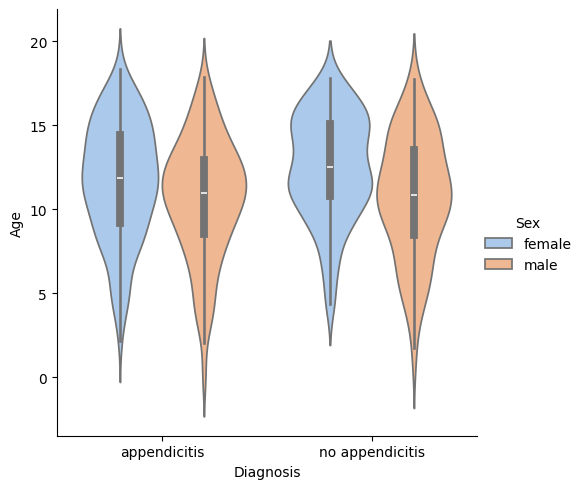

In [23]:
# Seaborn has a method called catplot() which helps visualising categorical data
# Let's start with Violin plots, which are a great way of visualising the distribution of data

# Plotting 'Diagnosis' against 'Age' and colouring based on 'Sex' 
# errorbar='pi' parameter draws a line to represent the range where 95% of data falls (95% percentile interval)
sns.catplot(data=app_data_filtered, 
            x="Diagnosis", 
            y="Age", 
            hue="Sex", 
            kind="violin", 
            errorbar="pi",
            palette="pastel"
           )

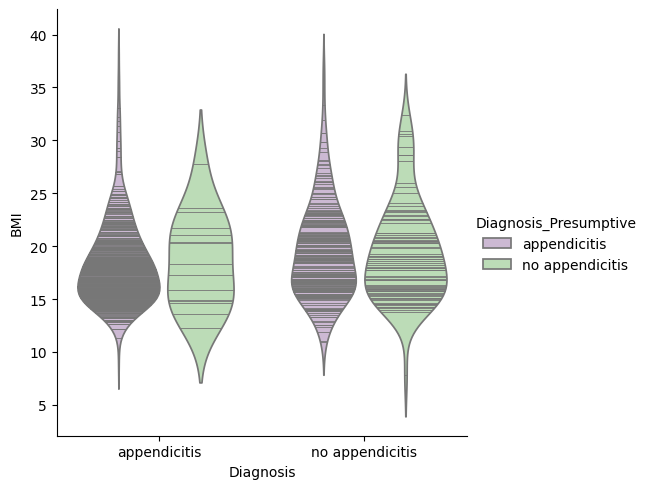

In [24]:
# Let's plot Diagnosis vs BMI, coloured by Diagnosis_Presumptive
# This will give us more info related to BMI.
# We'll be able to roughly visualise the difference between Diagnosis and Diagnosis_Presumptive
sns.catplot(data=app_data_filtered, 
            x="Diagnosis", 
            y="BMI", 
            hue="Diagnosis_Presumptive", 
            kind="violin", 
            errorbar="pi",
            palette="PRGn",
            inner='stick'
           )
# The inner='stick' parameter represents every observation inside the distribution

We make 2 observations here:
1. For the data provided, more children have appendicitis as the BMI increases. Then it decreases, which could be because of low
2. We see that the green violine on the left has very few lines which tells us that very few times did the children have appendicitis when the doctor presumed it to be. Also, the purple violin on the right tells us how many times the doctors presumed it to be appendicitis but it wasn't. This makes sense since we calculated above that the accuracy of doctors_prediction was 66%, so we should to see 36% wrong predictions in green violin on the left and purple violin on the right, combined.

<Axes: xlabel='Severity', ylabel='count'>

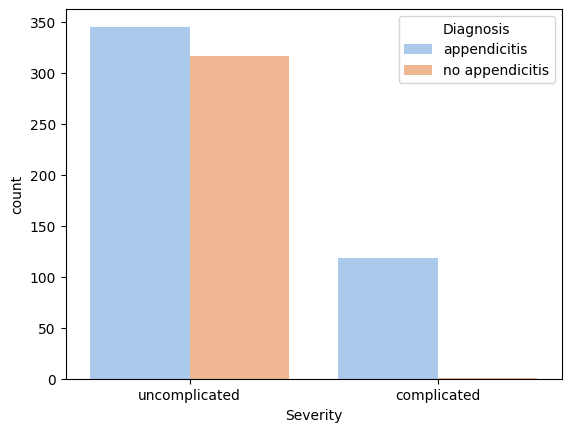

In [25]:
# Let's plot Severity and Diagnosis on a countplot
sns.countplot(data=app_data, 
            x="Severity",
            hue="Diagnosis",
            palette="pastel"
           )

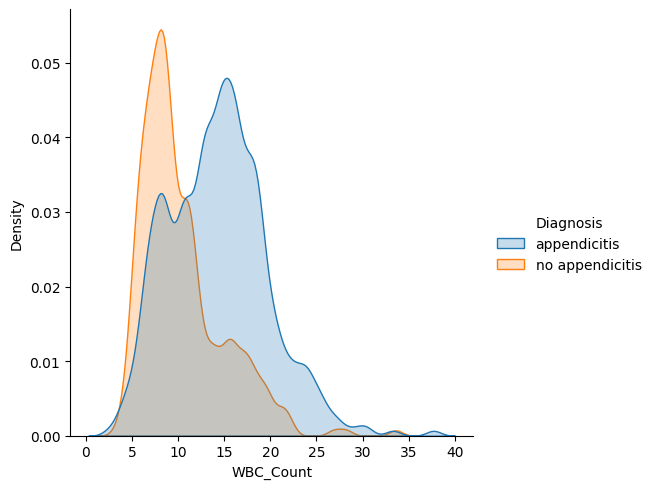

In [26]:
# Let's use distplot() from Seaborn to see the trends in numerical data 
# Plotting WBC (White Blood Count) coloured by Diagnosis
sns.displot(
    app_data_filtered, 
    x="WBC_Count", 
    hue='Diagnosis', 
    kind="kde", 
    bw_adjust=0.5, 
    fill=True
)

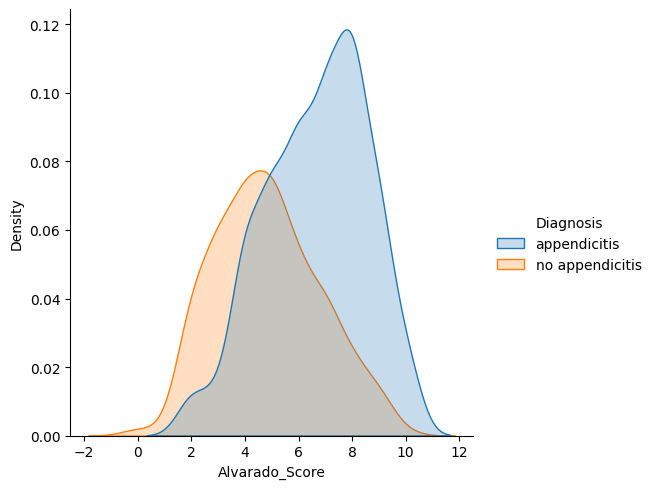

In [27]:
# Plotting Alvarado_Score
sns.displot(
    app_data_filtered, 
    x="Alvarado_Score", 
    hue='Diagnosis', 
    kind="kde", 
    bw_adjust=1, 
    fill=True
)

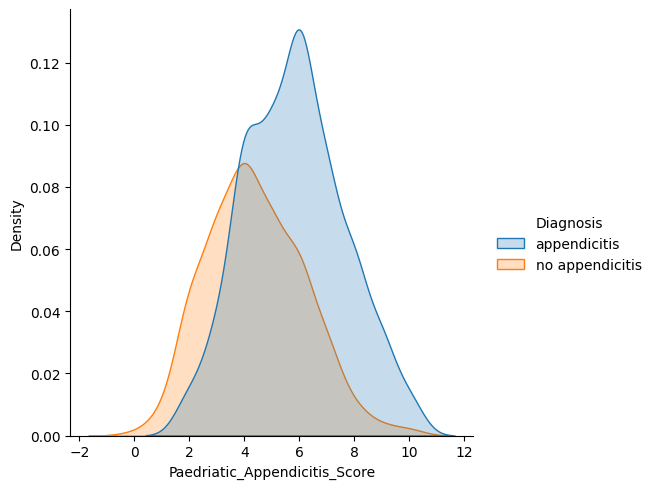

In [28]:
# Plotting Paedriatic_Appendicitis_Score
sns.displot(
    app_data_filtered, 
    x="Paedriatic_Appendicitis_Score", 
    hue='Diagnosis', 
    kind="kde", 
    bw_adjust=1, 
    fill=True
           )

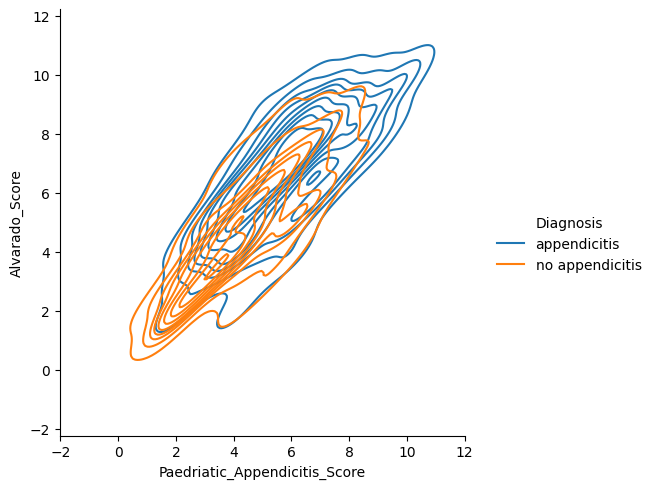

In [29]:
# Plotting Paedriatic_Appendicitis_Score vs Alvarado_Score
sns.displot(
    app_data_filtered, 
    x="Paedriatic_Appendicitis_Score", 
    y="Alvarado_Score",
    hue='Diagnosis', 
    kind="kde", 
    bw_adjust=1, 
    fill=False
           )

Both of them are indicators of appendicitis.
From the graph, we observe a positive linear correlation between them. Which we should expect.

<Axes: xlabel='Lower_Right_Abd_Pain', ylabel='count'>

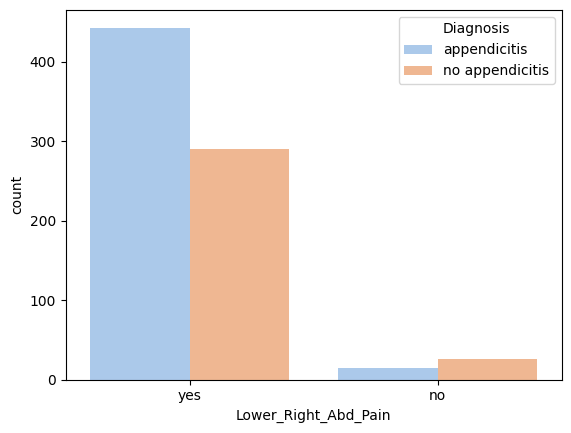

In [30]:
# Most common symptoms of Appendicitis are: pain in lower abdomen, nausea and loss of appetite.
# Let's plot all of these
# for column in ['Lower_Right_Abd_Pain','Nausea','Loss_of_Appetite']:
sns.countplot(data=app_data, 
            x="Lower_Right_Abd_Pain",
            hue="Diagnosis",
            palette="pastel"
           )

<Axes: xlabel='Nausea', ylabel='count'>

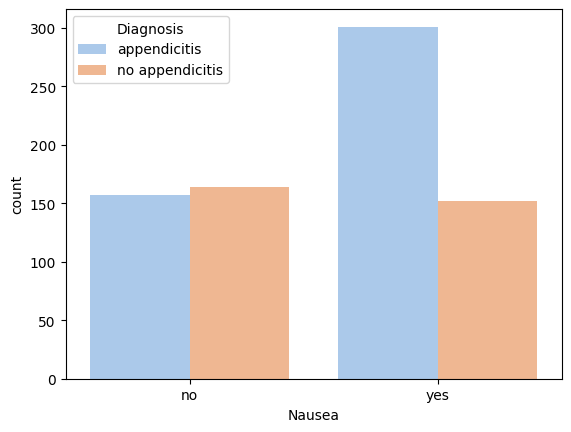

In [31]:
sns.countplot(data=app_data, 
            x="Nausea",
            hue="Diagnosis",
            palette="pastel"
           )

<Axes: xlabel='Loss_of_Appetite', ylabel='count'>

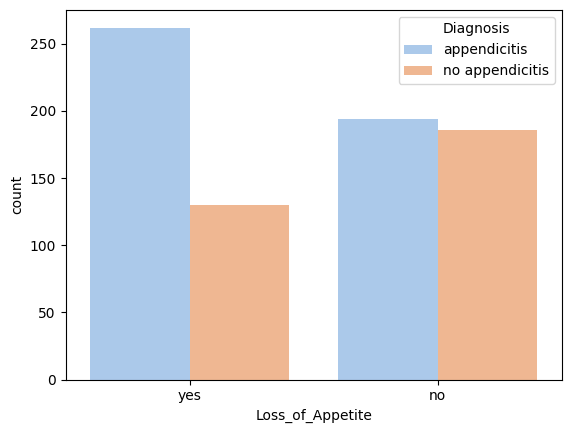

In [32]:
sns.countplot(data=app_data, 
            x="Loss_of_Appetite",
            hue="Diagnosis",
            palette="pastel"
           )

Let's plot a PairGrid graph, which plots a grid of plots showing relation between every numerical feature pair in the dataset.

Since the number of features are not that large, we can look for patterns of data from this grid.

This is very helpful for finding patterns between numerical features in a dataset, where the number of numerical features is small.

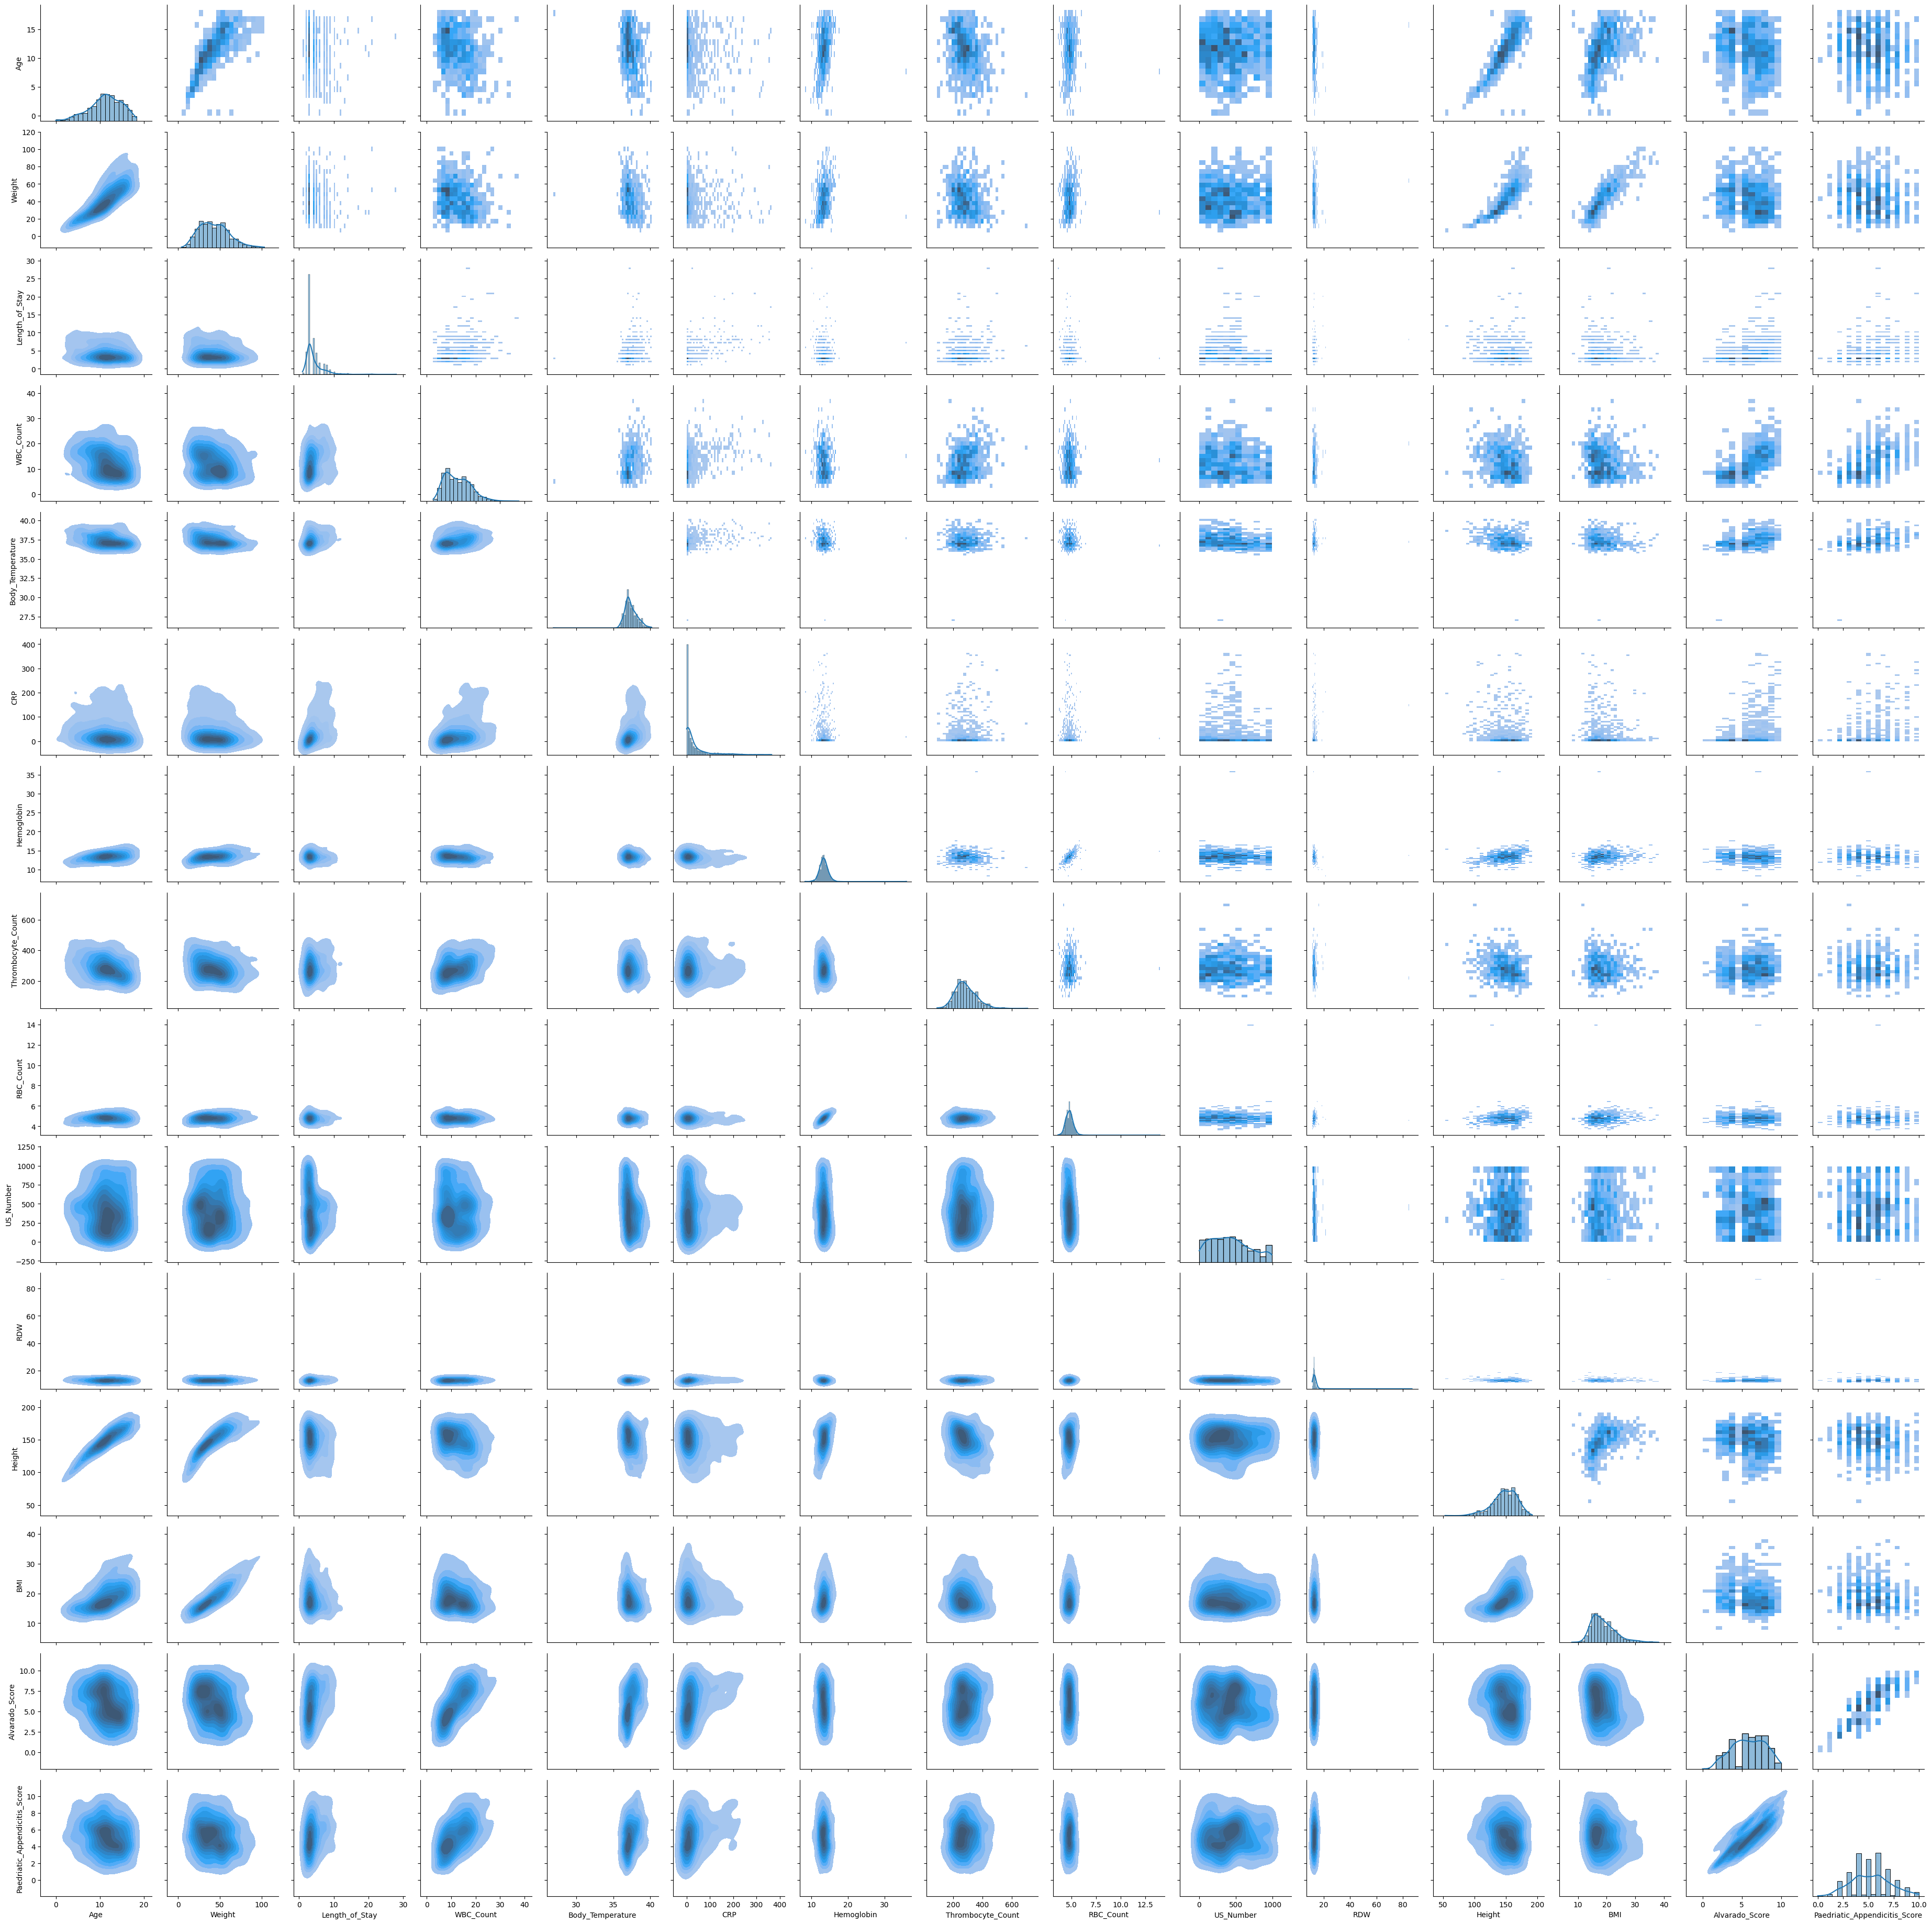

In [39]:
g = sns.PairGrid(app_data_filtered)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

<Axes: xlabel='Contralateral_Rebound_Tenderness', ylabel='count'>

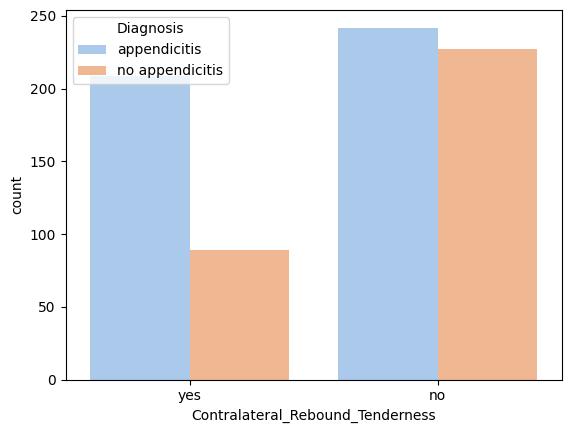

In [48]:
# Let's plot Contralateral_Rebound_Tenderness and Diagnosis on a countplot
sns.countplot(data=app_data, 
            x="Contralateral_Rebound_Tenderness",
            hue="Diagnosis",
            palette="pastel"
           )

<Axes: xlabel='Coughing_Pain', ylabel='count'>

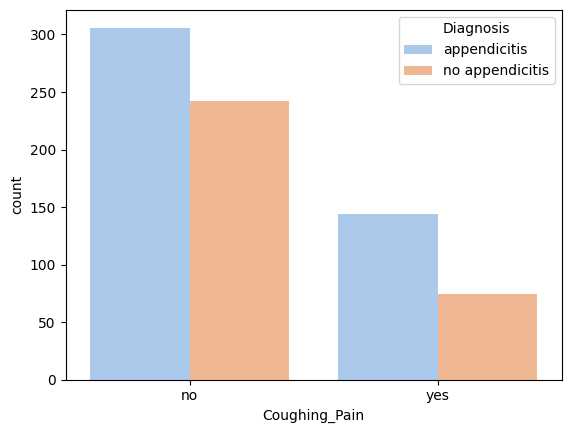

In [49]:
# Let's plot Coughing_Pain and Diagnosis on a countplot
sns.countplot(data=app_data, 
            x="Coughing_Pain",
            hue="Diagnosis",
            palette="pastel"
           )

<Axes: xlabel='Stool', ylabel='count'>

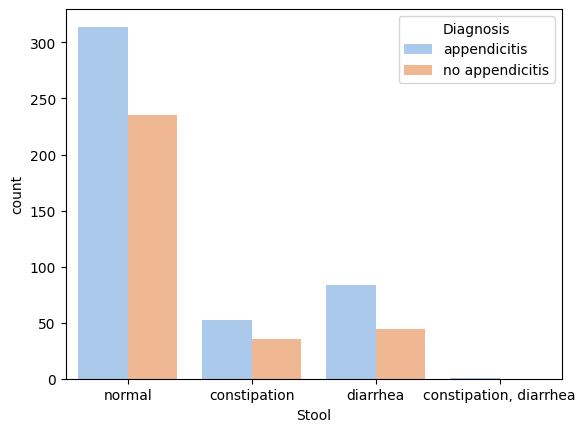

In [50]:
# Let's plot Stool and Diagnosis on a countplot
sns.countplot(data=app_data, 
            x="Stool",
            hue="Diagnosis",
            palette="pastel"
           )

# Complex Analysis

Let's perform some complex analysis now !

## k-fold Cross Validation

Let's perform k-fold Cross Validation with 5 folds

In [66]:
# Initialising cross_validate instance
cv_data = cross_validate(
    pipeline, x_train, y_train, cv = 10
)

# Priting the output of each step of k-fold Cross Validation 
for key, val in cv_data.items():
  print(f'{key}: {val}')

fit_time: [0.0442009  0.03541565 0.03213525 0.05180097 0.03578591 0.02754807
 0.02466989 0.02323008 0.02463627 0.02317405]
score_time: [0.01098609 0.00942326 0.02490807 0.01447392 0.00913501 0.00815487
 0.00759077 0.00760388 0.00774407 0.00746202]
test_score: [0.88888889 0.87301587 0.84126984 0.95238095 0.82539683 0.85483871
 0.85483871 0.90322581 0.82258065 0.87096774]


In [68]:
# Taking the mean and standard deviation of the accuracies we got from k-fold Cross Validation
accuracy_cv = cv_data['test_score'].mean()
accuracy_cv_std = cv_data['test_score'].std()

# Printing the results
print(f'The accuracy of our classifer is {accuracy_cv:.3f} +/- {accuracy_cv_std:.3f} with cross-validation.')
print(f'This is a better estimate - and we get some statistics too!')

The accuracy of our classifer is 0.869 +/- 0.037 with cross-validation.
This is a better estimate - and we get some statistics too!


## Learning Curve

Lets plot the learning curve for our model on our dataset which will reveal any issues with bias and variance with our model

Text(0, 0.5, 'Accuracy')

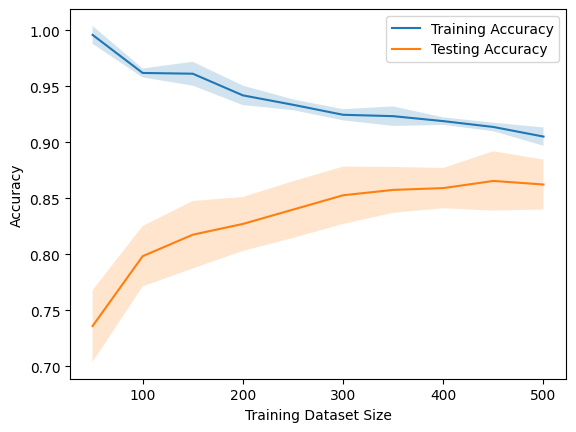

In [70]:
lc = learning_curve(
    pipeline, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5, scoring = 'accuracy'
)

fig, ax = plt.subplots()

train_acc = lc[1].mean(axis = 1)
train_acc_std = lc[1].std(axis = 1)
test_acc = lc[2].mean(axis = 1)
test_acc_std = lc[2].std(axis = 1)

ax.plot(lc[0], train_acc, label = 'Training Accuracy')
ax.fill_between(
    lc[0], train_acc + train_acc_std, train_acc - train_acc_std, alpha = 0.2
)

ax.plot(lc[0], test_acc, label = 'Testing Accuracy')
ax.fill_between(
    lc[0], test_acc + test_acc_std, test_acc - test_acc_std, alpha = 0.2
)
ax.legend()

ax.set_xlabel('Training Dataset Size')
ax.set_ylabel('Accuracy')

## Heatmap

We will use a heatmap to visualise the relation between y_test and y_predict

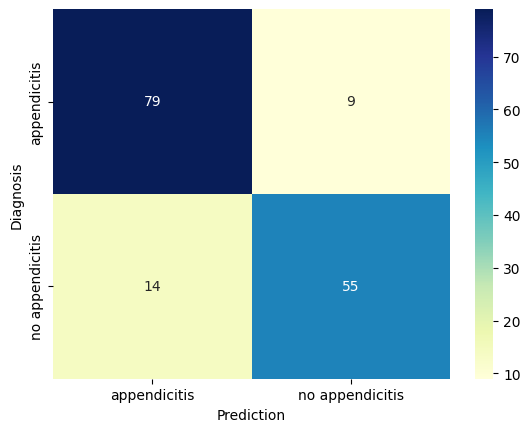

In [148]:
# Produce a contingency table
contigency= pd.crosstab(y_test, y_predict) 

# Plot an sns heatmap
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
# Set xlabel
plt.xlabel('Prediction')
plt.show()